In [1]:
from vizman import viz
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

default_things: str = "../Pyvizman/vizman/"
default_colors: dict = viz.load_data_from_json(default_things + "colors.json")

viz.set_visual_style(
    json_color_path=default_things + "colors.json", change_colors=False
)

reciprocity_colors = sns.blend_palette(
    [default_colors["purples"]["REDISH_PURPLE"],
     default_colors["warms"]["YELLOW"]],n_colors=11
)


In [2]:
scale:str = "033" # options are: 033, 060, 125, 250, 500
dataset_path: str = f"datasets/weighted/human_struct_scale{scale}.npy"
distance_path: str = f"datasets/weighted/distance_mat/distance_mat_human_struct_scale{scale}.npy"

In [3]:
dataset: np.ndarray = np.load(dataset_path)
distance: np.ndarray = np.load(distance_path)

In [4]:
dataset.min()

np.float64(0.0)

In [5]:
dataset.shape

(83, 83, 11)

In [6]:
n, _, r = dataset.shape
reciprocity_values = (np.arange(r) / 10).astype(str)

pd_dataset:pd.DataFrame = pd.DataFrame({
    'source': np.repeat(np.arange(n), n * r),
    'target': np.tile(np.repeat(np.arange(n), r), n),
    'reciprocity': np.tile(reciprocity_values, n * n),
    'weight': dataset.flatten()
})

pd_distance:pd.DataFrame = pd.DataFrame({
    'source': np.repeat(np.arange(n), n * r),
    'target': np.tile(np.repeat(np.arange(n), r), n),
    'reciprocity': np.tile(reciprocity_values, n * n),
    'distance': distance.flatten()
})

dataset_direct = pd_dataset[pd_dataset['weight'] != 0]
distance_indirect = pd_distance[pd_dataset['weight'] == 0]

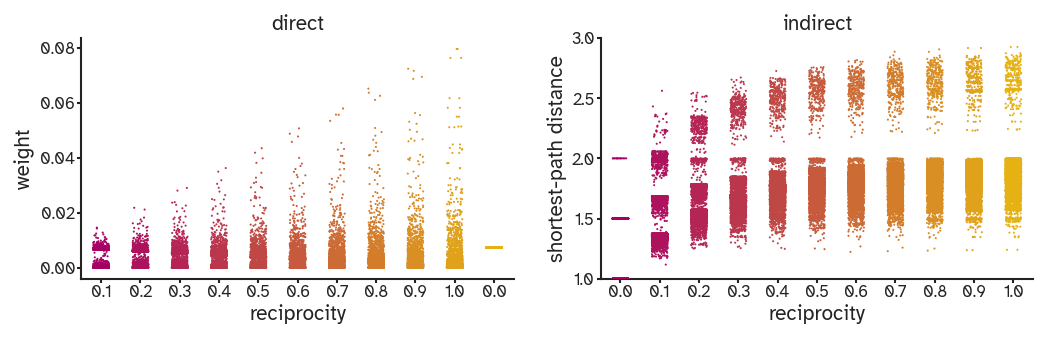

In [7]:
fig, axes = plt.subplot_mosaic("""AB""",
                               figsize=viz.cm_to_inch([18,6]),
                               dpi=150)
sns.stripplot(dataset_direct,
             x='reciprocity',
             y='weight',
             hue='reciprocity',
             palette=reciprocity_colors,
             jitter=0.2,
             ax=axes['A'],
             rasterized=True,
             s=1
             )
sns.stripplot(distance_indirect,
             x='reciprocity',
             y='distance',
             hue='reciprocity',
             palette=reciprocity_colors,
             jitter=0.2,
             ax=axes['B'],
             rasterized=True,
             s=1
             )

axes['B'].set_ylim(1,3)
axes['B'].set_ylabel("shortest-path distance")

axes['A'].set_title("direct")
axes['B'].set_title("indirect")
sns.despine(fig=fig)
fig.tight_layout()
plt.savefig("figures/weighted/weights_vs_reciprocity.pdf",bbox_inches='tight',transparent=True, dpi=600)